#   RM 294: Optimization 1 Project – Linear Programming

## Group members: 


| Group Member | UT EID |
| ----------- | ----------- |
| Manvi Goyal | mg65952 |
| Muskan Agrawal | ma64547        | 
| Rochan Nehete   | rrn479        | 
| Rianna Patel   | rnp599        | 


In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

In [2]:
roi_data = pd.read_csv('ROI_data.csv', index_col=0)
roi_data

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


## Part 3

In [3]:
obj = roi_data.iloc[0].values #ROI estimates of firm 1
obj

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

In [4]:
obj = roi_data.iloc[0].values # objective vector
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # Print & TV, no more than FB and email 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] # Social media more than twice of SEO and AdWords
A[2,:] = [1,1,1,1,1,1,1,1,1,1] # Total Amount
A[3:13,0:10] = np.diag(np.ones(10)) #Money spent on any medium be less than or equal to 3 million USD

b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3]) # limits on production, storage, and demand
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [5]:
MarkMod = gp.Model()

Markx = MarkMod.addMVar(len(obj)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
MarkModCon = MarkMod.addMConstrs(A, Markx, sense, b) # add the constraints to the model
MarkMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0
# None for no quadratic values in our equation, linear is the obj, 
MarkMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
MarkMod.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-14


In [6]:
print("Max ROI on the investment of 10 Million: $", round(MarkMod.objVal,5), "M")

Max ROI on the investment of 10 Million: $ 0.456 M


### Optimal Budget Allocation and ROI of firm 1

Maximum ROI on the investment of 10 Million: $ 0.456 M


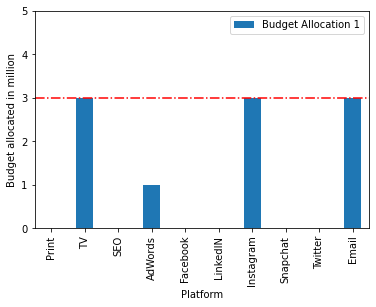

In [7]:
alloc_1 = MarkMod.x
Max_ROI_1 = MarkMod.objVal
alloc_1_df = pd.DataFrame(index=['Print','TV','SEO','AdWords','Facebook','LinkedIN','Instagram','Snapchat','Twitter','Email'])
alloc_1_df['Budget Allocation 1']=MarkMod.x 
alloc_1_df.plot(kind='bar', xlabel='Platform',ylabel='Budget allocated in million', ylim = (0,5))
import matplotlib.pyplot as plt
plt.axhline(y=3, color='r', linestyle='-.')
print("Maximum ROI on the investment of 10 Million: $", round(Max_ROI_1,5), "M")

## Part 6
To explore this further perform some analysis of how your optimal allocation would change
based on changes in the ROI data. Use the first ROI data as your starting point. By how much
could each advertising medium’s ROI increase or decrease and still result in the same optimal
allocation you found in step (3)?

In [8]:
Markx.SAObjLow

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [9]:
Markx.SAObjUp

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

In [10]:
df_limits_on_ROI = pd.DataFrame(columns=['Print','TV','SEO','AdWords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email'])
df_limits_on_ROI.loc[len(df_limits_on_ROI)] = Markx.SAObjLow
df_limits_on_ROI.loc[len(df_limits_on_ROI)] = Markx.SAObjUp
df_limits_on_ROI.rename(index={0:'Lower limit on ROI'},inplace=True)
df_limits_on_ROI.rename(index={1:'Upper limit on ROI'},inplace=True)
df_limits_on_ROI.loc[len(df_limits_on_ROI)] = roi_data.iloc[0]
df_limits_on_ROI.rename(index={2:'ROI estimate by Firm 1'},inplace=True)
df_limits_on_ROI

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Lower limit on ROI,-inf,0.039,-inf,0.033,-inf,-inf,0.039,-inf,-inf,0.029
Upper limit on ROI,0.049,0.062,0.039,0.046,0.029,0.039,inf,0.039,0.039,inf
ROI estimate by Firm 1,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044


In [11]:
roi_data.loc[len(roi_data)] = Markx.x
roi_data

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
2,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000


In [12]:
roi_data.rename(index={2:'Investment acc to 1st Firm'},inplace=True)

## Part 4

In [13]:
#Optimize using second ROI estimates
obj2 = roi_data.iloc[1].values # objective vector
A2 = np.zeros((13,10)) # initialize constraint matrix
A2[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # Print & TV, no more than FB and email 
A2[1,:] = [0,0,-2,-2,1,1,1,1,1,0] # Social media more than twice of SEO and AdWords
A2[2,:] = [1,1,1,1,1,1,1,1,1,1] # Total Amount
A2[3:13,0:10] = np.diag(np.ones(10)) #Money spent on any medium be less than or equal to 3 million USD

b2 = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3]) # limits on production, storage, and demand
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [14]:
MarkMod = gp.Model()

Markx = MarkMod.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
MarkModCon = MarkMod.addMConstrs(A2, Markx, sense, b2) # add the constraints to the model
MarkMod.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0
# None for no quadratic values in our equation, linear is the obj, 
MarkMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
MarkMod.optimize()

In [15]:
print("Max ROI on the investment of 10 Million: ", round(MarkMod.objVal,5), "M")

Max ROI on the investment of 10 Million:  0.456 M


Maximum ROI on the investment of 10 Million: $ 0.456 M


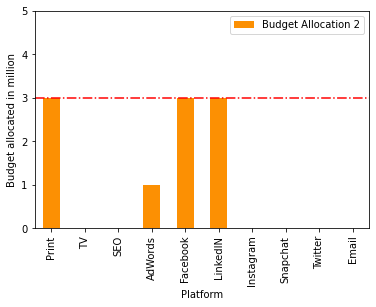

In [16]:
Markx.x
alloc_2 = Markx.x
Max_ROI_2 = round(MarkMod.objVal,5)
alloc_2_df = pd.DataFrame(index=['Print','TV','SEO','AdWords','Facebook','LinkedIN','Instagram','Snapchat','Twitter','Email'])
alloc_2_df['Budget Allocation 2']=MarkMod.x 
alloc_2_df.plot(kind='bar', xlabel='Platform',ylabel='Budget allocated in million',color='#fc9003',  ylim = (0,5))
plt.axhline(y=3, color='r', linestyle='-.')
print("Maximum ROI on the investment of 10 Million: $", round(Max_ROI_2,5), "M")

In [17]:
roi_data.loc[len(roi_data)] = Markx.x
roi_data

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
3,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000


In [18]:
roi_data.rename(index={3:'Investment acc to 2nd Firm'},inplace=True)
roi_data

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000


In [19]:
roi_investment = pd.DataFrame(roi_data.T)
roi_investment

Platform,ROI,Second Firms ROI Estimate,Investment acc to 1st Firm,Investment acc to 2nd Firm
Print,0.031,0.049,0.0,3.0
TV,0.049,0.023,3.0,0.0
SEO,0.024,0.024,0.0,0.0
AdWords,0.039,0.039,1.0,1.0
Facebook,0.016,0.044,0.0,3.0
LinkedIn,0.024,0.046,0.0,3.0
Instagram,0.046,0.026,3.0,0.0
Snapchat,0.026,0.019,0.0,0.0
Twitter,0.033,0.037,0.0,0.0
Email,0.044,0.026,3.0,0.0


### Part 5
Comparison of optimal allocations from ROI estimates of the firms

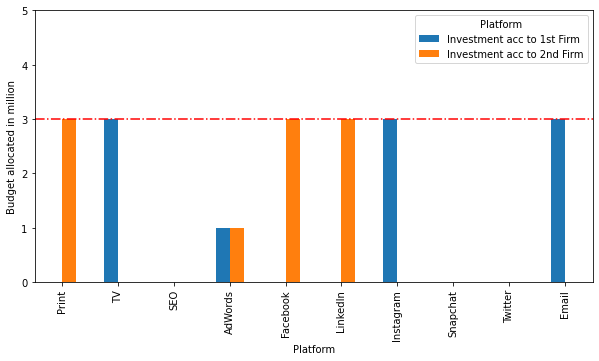

In [20]:
#Creating a dataframe roi_investment to keep a track of all the given scenarios we would go through in the project
roi_investment[['Investment acc to 1st Firm','Investment acc to 2nd Firm']].plot(kind = 'bar',xlabel='Platform',ylabel='Budget allocated in million', figsize=(10,5), ylim = (0,5))
plt.axhline(y=3, color='r', linestyle='-.')

In [21]:
#Adding returns according to the first and second firm to the roi_investment dataframe

roi_investment['Return acc to 1st Firm'] = roi_investment['ROI'] * roi_investment['Investment acc to 1st Firm'] 
roi_investment['Return acc to 2nd Firm'] = roi_investment['Second Firms ROI Estimate'] * roi_investment['Investment acc to 2nd Firm']
roi_investment

Platform,ROI,Second Firms ROI Estimate,Investment acc to 1st Firm,Investment acc to 2nd Firm,Return acc to 1st Firm,Return acc to 2nd Firm
Print,0.031,0.049,0.0,3.0,0.000,0.147
TV,0.049,0.023,3.0,0.0,0.147,0.000
SEO,0.024,0.024,0.0,0.0,0.000,0.000
AdWords,0.039,0.039,1.0,1.0,0.039,0.039
Facebook,0.016,0.044,0.0,3.0,0.000,0.132
LinkedIn,0.024,0.046,0.0,3.0,0.000,0.138
Instagram,0.046,0.026,3.0,0.0,0.138,0.000
Snapchat,0.026,0.019,0.0,0.0,0.000,0.000
Twitter,0.033,0.037,0.0,0.0,0.000,0.000
Email,0.044,0.026,3.0,0.0,0.132,0.000


In [22]:
#Adding returns obtained by using 1st firm's ROI on 2nd firms allocation and vice versa to the roi_investment dataframe
roi_investment['Return acc to 1st ROI on 2nd allocation'] = roi_investment['ROI'] * roi_investment['Investment acc to 2nd Firm']
roi_investment['Return acc to 2nd ROI on 1st allocation'] = roi_investment['Second Firms ROI Estimate'] * roi_investment['Investment acc to 1st Firm']
roi_investment

Platform,ROI,Second Firms ROI Estimate,Investment acc to 1st Firm,Investment acc to 2nd Firm,Return acc to 1st Firm,Return acc to 2nd Firm,Return acc to 1st ROI on 2nd allocation,Return acc to 2nd ROI on 1st allocation
Print,0.031,0.049,0.0,3.0,0.000,0.147,0.093,0.000
TV,0.049,0.023,3.0,0.0,0.147,0.000,0.000,0.069
SEO,0.024,0.024,0.0,0.0,0.000,0.000,0.000,0.000
AdWords,0.039,0.039,1.0,1.0,0.039,0.039,0.039,0.039
Facebook,0.016,0.044,0.0,3.0,0.000,0.132,0.048,0.000
LinkedIn,0.024,0.046,0.0,3.0,0.000,0.138,0.072,0.000
Instagram,0.046,0.026,3.0,0.0,0.138,0.000,0.000,0.078
Snapchat,0.026,0.019,0.0,0.0,0.000,0.000,0.000,0.000
Twitter,0.033,0.037,0.0,0.0,0.000,0.000,0.000,0.000
Email,0.044,0.026,3.0,0.0,0.132,0.000,0.000,0.078


In [23]:
roi_investment_matrix = pd.DataFrame(roi_investment.T) #getting rows into columns. We will aim to keep this as a consistent format throughout

In [24]:
roi_investment_matrix

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078


In [25]:
roi_investment_matrix['Total'] = roi_investment_matrix.sum(axis=1) #Adding a Toal ROI column which would denote how much %ROI did we get 
roi_investment_matrix

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total
Platform,,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044,0.332
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026,0.333
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000,10.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000,10.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132,0.456
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000,0.456
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000,0.252
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078,0.264


No, the allocation with 1st ROI Data and 2nd ROI data are different but the objective value comes out to be same. 

In [26]:
# If the first ROI was correct and we used the 2nd allocation, we lost how much?
round(roi_investment_matrix.loc['Return acc to 1st ROI on 2nd allocation']['Total'] - roi_investment_matrix.loc['Return acc to 1st Firm']['Total'],3)

-0.204

In [27]:
# If the second ROI was correct and we used the 1st allocation, we lost how much?
round(roi_investment_matrix.loc['Return acc to 2nd ROI on 1st allocation']['Total'] - roi_investment_matrix.loc['Return acc to 2nd Firm']['Total'],3)

-0.192

### Do you think the third constraint above, based on your boss’ experience, is useful?

In [28]:
#Lets check how much we can make if we remove the 3rd constriant for first firm

obj3 = roi_data.iloc[0].values # objective vector
A3 = np.zeros((3,10)) # initialize constraint matrix
A3[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # Print & TV, no more than FB and email 
A3[1,:] = [0,0,-2,-2,1,1,1,1,1,0] # Social media more than twice of SEO and AdWords
A3[2,:] = [1,1,1,1,1,1,1,1,1,1] # Total Amount

b3 = np.array([0,0,10]) # limits on production, storage, and demand
sense = np.array(['<','>','<']) # all constraints are less than or equal constraints

In [29]:
MarkMod = gp.Model()

Markx = MarkMod.addMVar(len(obj3)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
MarkModCon = MarkMod.addMConstrs(A3, Markx, sense, b3) # add the constraints to the model
MarkMod.setMObjective(None,obj3,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0
# None for no quadratic values in our equation, linear is the obj, 
MarkMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
MarkMod.optimize()

In [30]:
print("Max ROI on the investment of 10 Million if upper limit on investment at each head is removed: ", round(MarkMod.objVal,5), "M")

Max ROI on the investment of 10 Million if upper limit on investment at each head is removed:  0.465 M


In [31]:
roi_investment_matrix.drop('Total', inplace=True, axis=1)
roi_investment_matrix.loc[len(roi_investment_matrix)] = Markx.x # We will add our scennew scenario to this df
roi_investment_matrix.rename(index={8:'Investment acc to 1st Firm but no upper limit'},inplace=True) #Renaming index of the latest added row
roi_investment_matrix 

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078
Investment acc to 1st Firm but no upper limit,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000


In [32]:
#Lets check how much we can make if we remove the 3rd constriant for second firm

obj4 = roi_data.iloc[1].values # objective vector
A4 = np.zeros((3,10)) # initialize constraint matrix
A4[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # Print & TV, no more than FB and email 
A4[1,:] = [0,0,-2,-2,1,1,1,1,1,0] # Social media more than twice of SEO and AdWords
A4[2,:] = [1,1,1,1,1,1,1,1,1,1] # Total Amount

b4 = np.array([0,0,10]) # limits on production, storage, and demand
sense = np.array(['<','>','<']) # all constraints are less than or equal constraints

In [33]:
MarkMod = gp.Model()

Markx = MarkMod.addMVar(len(obj4)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
MarkModCon = MarkMod.addMConstrs(A4, Markx, sense, b4) # add the constraints to the model
MarkMod.setMObjective(None,obj4,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0
# None for no quadratic values in our equation, linear is the obj, 
MarkMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
MarkMod.optimize()

In [34]:
print("Max ROI on the investment of 10 Million if upper limit on investment at each head is removed: ", round(MarkMod.objVal,5), "M")

Max ROI on the investment of 10 Million if upper limit on investment at each head is removed:  0.465 M


In [35]:
roi_investment_matrix.loc[len(roi_investment_matrix)] = Markx.x # We will add our scennew scenario to this df
roi_investment_matrix.rename(index={9:'Investment acc to 2nd Firm but no upper limit'},inplace=True) #Renaming index of the latest added row
roi_investment_matrix

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078
Investment acc to 1st Firm but no upper limit,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000


In [36]:
roi_investment_matrix2 = pd.DataFrame(roi_investment_matrix.T)

In [37]:
#Calculating Returns on 1st and 2nd firms without upper limit in our investment matrix
roi_investment_matrix2['Return acc to 1st Firm but no upper limit'] = roi_investment_matrix2['ROI'] * roi_investment_matrix2['Investment acc to 1st Firm but no upper limit']
roi_investment_matrix2['Return acc to 2nd Firm but no upper limit'] = roi_investment_matrix2['Second Firms ROI Estimate'] * roi_investment_matrix2['Investment acc to 2nd Firm but no upper limit']
roi_investment_matrix2

Platform,ROI,Second Firms ROI Estimate,Investment acc to 1st Firm,Investment acc to 2nd Firm,Return acc to 1st Firm,Return acc to 2nd Firm,Return acc to 1st ROI on 2nd allocation,Return acc to 2nd ROI on 1st allocation,Investment acc to 1st Firm but no upper limit,Investment acc to 2nd Firm but no upper limit,Return acc to 1st Firm but no upper limit,Return acc to 2nd Firm but no upper limit
Print,0.031,0.049,0.0,3.0,0.000,0.147,0.093,0.000,0.0,5.0,0.000,0.245
TV,0.049,0.023,3.0,0.0,0.147,0.000,0.000,0.069,5.0,0.0,0.245,0.000
SEO,0.024,0.024,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
AdWords,0.039,0.039,1.0,1.0,0.039,0.039,0.039,0.039,0.0,0.0,0.000,0.000
Facebook,0.016,0.044,0.0,3.0,0.000,0.132,0.048,0.000,0.0,5.0,0.000,0.220
LinkedIn,0.024,0.046,0.0,3.0,0.000,0.138,0.072,0.000,0.0,0.0,0.000,0.000
Instagram,0.046,0.026,3.0,0.0,0.138,0.000,0.000,0.078,0.0,0.0,0.000,0.000
Snapchat,0.026,0.019,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
Twitter,0.033,0.037,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
Email,0.044,0.026,3.0,0.0,0.132,0.000,0.000,0.078,5.0,0.0,0.220,0.000


In [38]:
#Calculating Returns on 1st on 2nd allocation and vice versa without upper limit in our investment matrix
roi_investment_matrix2['Return acc to 1st ROI on 2nd allocation without upper limit'] = roi_investment_matrix2['ROI'] * roi_investment_matrix2['Investment acc to 2nd Firm but no upper limit']
roi_investment_matrix2['Return acc to 2nd ROI on 1st allocation without upper limit'] = roi_investment_matrix2['Second Firms ROI Estimate'] * roi_investment_matrix2['Investment acc to 1st Firm but no upper limit']
roi_investment_matrix2

Platform,ROI,Second Firms ROI Estimate,Investment acc to 1st Firm,Investment acc to 2nd Firm,Return acc to 1st Firm,Return acc to 2nd Firm,Return acc to 1st ROI on 2nd allocation,Return acc to 2nd ROI on 1st allocation,Investment acc to 1st Firm but no upper limit,Investment acc to 2nd Firm but no upper limit,Return acc to 1st Firm but no upper limit,Return acc to 2nd Firm but no upper limit,Return acc to 1st ROI on 2nd allocation without upper limit,Return acc to 2nd ROI on 1st allocation without upper limit
Print,0.031,0.049,0.0,3.0,0.000,0.147,0.093,0.000,0.0,5.0,0.000,0.245,0.155,0.000
TV,0.049,0.023,3.0,0.0,0.147,0.000,0.000,0.069,5.0,0.0,0.245,0.000,0.000,0.115
SEO,0.024,0.024,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
AdWords,0.039,0.039,1.0,1.0,0.039,0.039,0.039,0.039,0.0,0.0,0.000,0.000,0.000,0.000
Facebook,0.016,0.044,0.0,3.0,0.000,0.132,0.048,0.000,0.0,5.0,0.000,0.220,0.080,0.000
LinkedIn,0.024,0.046,0.0,3.0,0.000,0.138,0.072,0.000,0.0,0.0,0.000,0.000,0.000,0.000
Instagram,0.046,0.026,3.0,0.0,0.138,0.000,0.000,0.078,0.0,0.0,0.000,0.000,0.000,0.000
Snapchat,0.026,0.019,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
Twitter,0.033,0.037,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
Email,0.044,0.026,3.0,0.0,0.132,0.000,0.000,0.078,5.0,0.0,0.220,0.000,0.000,0.130


In [39]:
#getting the investment matrix back in its original form 
roi_investment_matrix_all_combinations = pd.DataFrame(roi_investment_matrix2.T)
roi_investment_matrix_all_combinations

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078
Investment acc to 1st Firm but no upper limit,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000


In [40]:
#calculating a Total ROI in % as a column
roi_investment_matrix_all_combinations['Total'] = roi_investment_matrix_all_combinations.sum(axis=1)
roi_investment_matrix_all_combinations

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total
Platform,,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044,0.332
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026,0.333
Investment acc to 1st Firm,0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000,10.000
Investment acc to 2nd Firm,3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000,10.000
Return acc to 1st Firm,0.000,0.147,0.000,0.039,0.000,0.000,0.138,0.000,0.000,0.132,0.456
Return acc to 2nd Firm,0.147,0.000,0.000,0.039,0.132,0.138,0.000,0.000,0.000,0.000,0.456
Return acc to 1st ROI on 2nd allocation,0.093,0.000,0.000,0.039,0.048,0.072,0.000,0.000,0.000,0.000,0.252
Return acc to 2nd ROI on 1st allocation,0.000,0.069,0.000,0.039,0.000,0.000,0.078,0.000,0.000,0.078,0.264
Investment acc to 1st Firm but no upper limit,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,10.000


In [41]:
# If the first ROI was correct and we used the 2nd allocation, we lost how much if no upper bound at spending on each category?
roi_investment_matrix_all_combinations.loc['Return acc to 1st ROI on 2nd allocation without upper limit']['Total'] - roi_investment_matrix_all_combinations.loc['Return acc to 1st Firm but no upper limit']['Total']

-0.22999999999999998

In [42]:
# If the second ROI was correct and we used the 1st allocation, we lost how much if no upper bound at spending on each category?
roi_investment_matrix_all_combinations.loc['Return acc to 2nd ROI on 1st allocation without upper limit']['Total'] - roi_investment_matrix_all_combinations.loc['Return acc to 2nd Firm but no upper limit']['Total']

-0.21999999999999997

The third constraint is useful because without that we are spending in only 2 channels which increases the loss amount in case the assumed ROI is wrong. 

## Part 7 : 
Your boss has gained permission to reinvest half of the return. For example, if the marketing
obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% =
$10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given
by your boss are still in place for each month. What is the optimal allocation for each month?

In [43]:
# Loading ROI Monthly csv and converting the values to percentage by dividing by 100 
roi_monthly = (pd.read_csv('roi_mat.csv', index_col=0))/100
roi_monthly

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034
October,0.030,0.030,0.031,0.046,0.031,0.033,0.032,0.0230,0.025,0.032


In [44]:
# Initialize a Dataframe with incremental budget values

budget = [10] #set initial $10M budget
budget_df = pd.DataFrame(budget, columns=['budget'])

# Initialize a DataFrame to save the ROI values each month

df_monthly_returns = pd.DataFrame(columns=['return'])

# Initialize a Dataframe to store monthly allocations

df_monthly_allocation = pd.DataFrame(columns=['Print','TV','SEO','AdWords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email'])

for i in range(len(roi_monthly)):
    obj = roi_monthly.iloc[i].values # objective vector, changes every month
    A = np.zeros((13,10)) # initialize constraint matrix
    A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # Print & TV, no more than FB and email 
    A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] # Social media more than twice of SEO and AdWords
    A[2,:] = [1,1,1,1,1,1,1,1,1,1] # Total Amount
    A[3:13,0:10] = np.diag(np.ones(10)) # Money spent on any medium be less than or equal to 3 million USD

    b = np.array([0,0,budget_df.loc[i]['budget'],3,3,3,3,3,3,3,3,3,3]) # The total budget keeps changing according to previous month's returns so it is dynamic
    sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<'])     
    MarkMod = gp.Model()

    Markx = MarkMod.addMVar(len(obj)) # tell the model how many variables there are
    # must define the variables before adding constraints because variables go into the constraints
    MarkModCon = MarkMod.addMConstrs(A, Markx, sense, b) # add the constraints to the model
    MarkMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    # None for no quadratic values in our equation, linear is the obj, 
    MarkMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    MarkMod.optimize()
    
    # Storing the returns from marketing every month in the data frame df_monthly_returns
    df_monthly_returns.loc[len(df_monthly_returns)] = round(MarkMod.objVal,5)
    
    # Storing the monthly allocation every month in the data frame df_monthly_allocation
    df_monthly_allocation.loc[len(df_monthly_allocation)] = Markx.x
    
    # Storing the available budget for next month by adding the 50% of previous month's returns to 10M
    budget_df.loc[len(budget_df)] = (budget_df.loc[i] + 0.5*(MarkMod.objVal))
    

In [45]:
df_monthly_allocation #Monthly Allocation of funds in million USD 

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,3.000000,0.0,0.0,1.333333,0.000000,0.000000,2.666667,0.0,0.000000,3.000000
1,3.000000,0.0,0.0,2.395500,3.000000,0.000000,0.000000,0.0,1.791000,0.000000
2,0.000000,0.0,0.0,3.000000,0.000000,3.000000,1.389648,0.0,3.000000,0.000000
3,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,1.596856,0.000000
4,1.804100,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,3.000000,3.000000
5,3.000000,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,2.020172,3.000000
6,1.123777,0.0,0.0,3.000000,1.123777,0.000000,3.000000,0.0,3.000000,0.000000
7,3.000000,0.0,0.0,1.827294,0.000000,0.654588,0.000000,0.0,3.000000,3.000000
8,1.362933,0.0,0.0,3.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.362933
9,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,0.000000,2.955475


In [46]:
budget_df #budget at end of each month from January[0] to December[11] 

,budget
0,10.000000
1,10.186500
2,10.389648
3,10.596856
4,10.804100
5,11.020172
6,11.247555
7,11.481882
8,11.725865
9,11.955475


In [47]:
df_monthly_returns #Monthly returns at end of each month from January[0] to December[11] 

,return
0,0.37300
1,0.40630
2,0.41442
3,0.41449
4,0.43214
5,0.45477
6,0.46865
7,0.48797
8,0.45922
9,0.42758


# Part 8
A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not
need to solve a new optimization model. Describe how my might model this?

In [48]:
# Calculating difference between months to evaluate whether the budget is stable or not

df_monthly_allocation_copy = df_monthly_allocation
# df_monthly_allocation['print_diff'] = df_monthly_allocation['Print'].diff()
df_monthly_allocation['TV_diff'] = df_monthly_allocation['TV'].diff()
df_monthly_allocation['SEO_diff'] = df_monthly_allocation['SEO'].diff()
df_monthly_allocation['AdWords_diff'] = df_monthly_allocation['AdWords'].diff()
df_monthly_allocation['Facebook_diff'] = df_monthly_allocation['Facebook'].diff()
df_monthly_allocation['LinkedIn_diff'] = df_monthly_allocation['LinkedIn'].diff()
df_monthly_allocation['Instagram_diff'] = df_monthly_allocation['Instagram'].diff()
df_monthly_allocation['Snapchat_diff'] = df_monthly_allocation['Snapchat'].diff()
df_monthly_allocation['Twitter_diff'] = df_monthly_allocation['Twitter'].diff()
df_monthly_allocation['Email_diff'] = df_monthly_allocation['Email'].diff()

In [49]:
df_monthly_allocation

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,TV_diff,SEO_diff,AdWords_diff,Facebook_diff,LinkedIn_diff,Instagram_diff,Snapchat_diff,Twitter_diff,Email_diff
0,3.000000,0.0,0.0,1.333333,0.000000,0.000000,2.666667,0.0,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.000000,0.0,0.0,2.395500,3.000000,0.000000,0.000000,0.0,1.791000,0.000000,0.0,0.0,1.062167,3.000000,0.000000,-2.666667,0.0,1.791000,-3.000000
2,0.000000,0.0,0.0,3.000000,0.000000,3.000000,1.389648,0.0,3.000000,0.000000,0.0,0.0,0.604500,-3.000000,3.000000,1.389648,0.0,1.209000,0.000000
3,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,1.596856,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.610352,0.0,-1.403144,0.000000
4,1.804100,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,3.000000,3.000000,0.0,0.0,-3.000000,0.000000,-3.000000,0.000000,0.0,1.403144,3.000000
5,3.000000,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,2.020172,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.979828,0.000000
6,1.123777,0.0,0.0,3.000000,1.123777,0.000000,3.000000,0.0,3.000000,0.000000,0.0,0.0,3.000000,1.123777,0.000000,0.000000,0.0,0.979828,-3.000000
7,3.000000,0.0,0.0,1.827294,0.000000,0.654588,0.000000,0.0,3.000000,3.000000,0.0,0.0,-1.172706,-1.123777,0.654588,-3.000000,0.0,0.000000,3.000000
8,1.362933,0.0,0.0,3.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.362933,0.0,0.0,1.172706,0.000000,2.345412,0.000000,0.0,0.000000,-1.637067
9,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,0.000000,2.955475,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,-3.000000,1.592543


The difference is more than 1 and at places is 3, so the budget allocation is not stable.

### If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?
 
I will make the budget stable by adding more constraints. In a real world scenario, it would be unethical to invest for one month in a channel and then not invest in it the next month, as this would lead to a bad relationship between the channel clients and the business. Therefore, we believe that there should be a constraint making sure that the investment per month should happen in a serial fashion in order to make the budget stable

In [50]:
MarkMod.objVal

0.5168341742146887

In [51]:
df_monthly_allocation_copy.diff() # a better way to calculate the difference, should've done this earlier

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,TV_diff,SEO_diff,AdWords_diff,Facebook_diff,LinkedIn_diff,Instagram_diff,Snapchat_diff,Twitter_diff,Email_diff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.0,0.0,1.062167,3.000000,0.000000,-2.666667,0.0,1.791000,-3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-3.000000,0.0,0.0,0.604500,-3.000000,3.000000,1.389648,0.0,1.209000,0.000000,0.0,0.0,-0.457667,-6.000000,3.000000,4.056315,0.0,-0.582000,3.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.610352,0.0,-1.403144,0.000000,0.0,0.0,-0.604500,3.000000,-3.000000,0.220704,0.0,-2.612144,0.000000
4,1.804100,0.0,0.0,-3.000000,0.000000,-3.000000,0.000000,0.0,1.403144,3.000000,0.0,0.0,-3.000000,0.000000,-3.000000,-1.610352,0.0,2.806287,3.000000
5,1.195900,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.979828,0.000000,0.0,0.0,3.000000,0.000000,3.000000,0.000000,0.0,-2.382972,-3.000000
6,-1.876223,0.0,0.0,3.000000,1.123777,0.000000,0.000000,0.0,0.979828,-3.000000,0.0,0.0,3.000000,1.123777,0.000000,0.000000,0.0,1.959657,-3.000000
7,1.876223,0.0,0.0,-1.172706,-1.123777,0.654588,-3.000000,0.0,0.000000,3.000000,0.0,0.0,-4.172706,-2.247555,0.654588,-3.000000,0.0,-0.979828,6.000000
8,-1.637067,0.0,0.0,1.172706,0.000000,2.345412,0.000000,0.0,0.000000,-1.637067,0.0,0.0,2.345412,1.123777,1.690824,3.000000,0.0,0.000000,-4.637067
9,-1.362933,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,-3.000000,1.592543,0.0,0.0,-1.172706,0.000000,-2.345412,3.000000,0.0,-3.000000,3.229610
